# A Manual of Instructional Problems for the U.S.G.S Modflow Model

# Problem 1: The Theis Solution

## Introduction

With the exception of Darcy’s Law, perhaps the most widely used analytical 
technique by hydrologists is the solution by Theis (1935). It is therefore 
fitting that the first problem presented in this manual is a benchmark of 
MODFLOW with the Theis solution. Three different model configurations for 
analyzing radial flow to a well are examined. The techniques described in 
this problem can be generally applied to well test analysis and 
representations of radial flow.

## Problem Statement and Data

Theis’ solution predicts drawdown in a confined aquifer at any distance from a well at any time since the start of pumping given the aquifer properties, transmissivity and storage coefficient.

The assumptions inherent in the Theis solution include:

1) The aquifer is homogeneous, isotropic, uniform thickness, and of infinite areal extent.
2) The initial potentiometric surface is horizontal and uniform.
3) The well is pumped at a constant rate and it fully penetrates the aquifer.
4) Flow to the well is horizontal, the aquifer is fully confined from above and below.
5) The well diameter is small, storage in the wellbore can be neglected.
6) Water is removed from storage instantaneously with decline in head.

All of these assumptions, with the exception of infinite areal extent can be
easily represented with the numerical model. Several options exist to represent the domain as effectively infinite. The most frequently applied method is to extend the model domain beyond the effects of the stress. The modeled domain is therefore usually fairly large and a limited time frame is modeled. An increasing grid spacing expansion is used to extend the model boundaries.

The model domain is assumed to be uniform, homogeneous, and isotropic. A single layer is used to model the confined aquifer. A fully penetrating well located at the center of the model domain pumps at a constant rate. The potentiometric surface of the aquifer is monitored with time at an observation well 55 m from the pumping well. Specific details of the problem are from Freeze and Cherry (1979) pp. 345, and are given in Table 1.1.


#### Part a
Represent the entire aquifer domain by using the grid spacing shown in Table 1.2. Place the well at the center of the domain, row 10, column 10. Run the model, noting drawdown at each time step at an observation point 55 m from the pumping well. The configuration of the model for part a and future parts b, c, and d is shown in Figure 1.1.


### Table 1.2 Grid spacing used for Part a model configurations

| Row number (i) (=column number (j)) | Part a |
|-------------------------------------|--------|
| 1                                   | 300    |
| 2                                   | 200    |
| 3                                   | 150    |
| 4                                   | 100    |
| 5                                   | 80     |
| 6                                   | 60     |
| 7                                   | 40     |
| 8                                   | 30     |
| 9                                   | 30     |
| 10                                  | 20     |
| 11                                  | 30     |
| 12                                  | 30     |
| 13                                  | 40     |
| 14                                  | 60     |
| 15                                  | 80     |
| 16                                  | 100    |
| 17                                  | 150    |
| 18                                  | 200    |
| 19                                  | 300    |

Go into excel or notepad and create the table depicted above and save as a '.csv' file. csv simply stands for "comma separated values". As you can see in the code below, I named my file "table1.2".

In [1]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
#import csv

In [2]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table1.2.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
300.0
200.0
150.0
100.0
80.0
60.0
40.0
30.0
30.0
20.0
30.0
30.0
40.0
60.0
80.0
100.0
150.0
200.0
300.0
[300.0, 200.0, 150.0, 100.0, 80.0, 60.0, 40.0, 30.0, 30.0, 20.0, 30.0, 30.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0]


In [3]:
#code for part a grid
#import different packages that will be used throughout the program
%matplotlib inline
import sys
import os
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.11.3
matplotlib version: 2.0.0
flopy version: 3.2.6


[ 300.  200.  150.  100.   80.   60.   40.   30.   30.   20.   30.   30.
   40.   60.   80.  100.  150.  200.  300.]
2000.0


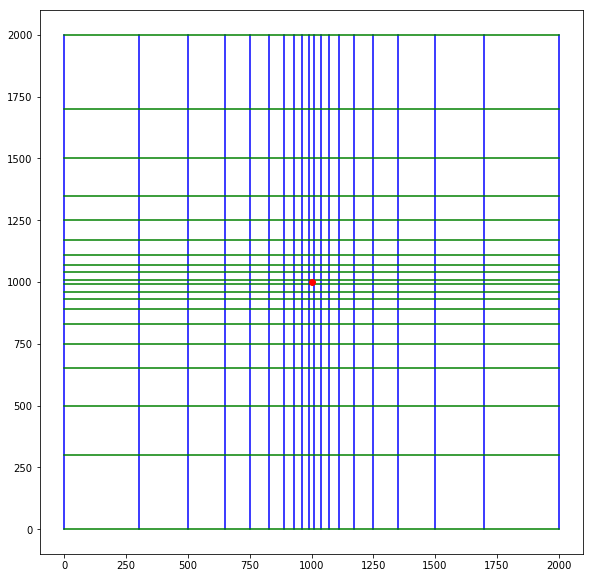

In [4]:
#code to create the grid image
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0 #sets ymin equal to zero
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0 #sets xmin equal to zero
x = 0 #sets x equal to zero
y = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean = delr_array.sum() * .5
ymean = delr_array.sum() * .5

#create the well (red dot)
def plot_well(xmean, ymean, sym):
    plt.plot(xmean, ymean, sym)
plot_well(xmean, ymean, sym='ro')
#'ro' creates a red circle

### Table 1.1 Parameters used in Problem 1a

| Variable | Value  |
|----------------------------|-----------------|
| Initial head               | 0.0 m           |
| Transmissivity             | 0.0023 m^2/s    |
| Storage coefficient        | 0.00075         |
| Pumping rate               | 4 x 10^-3 m^3/s |
| Final time                 | 86400 s         |
| Number of time steps       | 20              |
| Time step expansion factor | 1.3             |
| SIP iteration parameters   | 5               |
| Closure criterion          | 0.0001          |
| Maximum number iterations  | 50              |

In [5]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
trans = 23.e-4 #transmissivity (is equal to hk*(top-botm))
ss = 0.00075 #storage coefficient
pr = 4.e-3 #pumping rate
perlen = 86400 #final time (period length)
nstp = 20 #number of time steps
tsmult = 1.3 #time step expansion factor (time step multiplier)
sip_it_par = 5 #SIP iteration parameters
hclose = 1.e-4 #closure criterion (the head change criterion for convergence)
mxiter = 50 #maximum number of iterations
nlay = 1 #number of layers
nrow = 19 #number of rows
ncol = 19 #number of columns

#print values to make sure they are all stored properly
#put in quotes to make a string, .format takes whatever is in the () 
#and changes it to a float, it is then stored in the {}

print('initial head: {}'.format(inh))
print('transmissivity: {} m^2/s'.format(trans))
print('storage coefficient: {}'.format(ss))
print('pumping rate: {} m^3/s'.format(pr))
print('final time: {} s'.format(perlen))
print('number of time steps: {}'.format(nstp))
print('time step expansion factor: {}'.format(tsmult))
print('SIP iteration parameters: {}'.format(sip_it_par))
print('closure criterion: {}'.format(hclose))
print('maximum number of iterations: {}'.format(mxiter))


initial head: 0.0
transmissivity: 0.0023 m^2/s
storage coefficient: 0.00075
pumping rate: 0.004 m^3/s
final time: 86400 s
number of time steps: 20
time step expansion factor: 1.3
SIP iteration parameters: 5
closure criterion: 0.0001
maximum number of iterations: 50


In [6]:
#Flopy objects
modelname = 'p1_pa' #short for problem 1 part a
exe_name = '../MF2005.1_12/bin/mf2005.exe'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = modelname)

In [7]:
#call in the discretization package
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [8]:
#call in the basic package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)


In [9]:
#call in the well package (WEL)
# Remember to use zero-based layer, row, column indices!
wel_sp1 = [[0, 9, 9, -pr]]
stress_period_data = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)


In [10]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

In [11]:
#call in the layer-propery flow (LPF)
hk = trans
ss = 75e-5
laytyp = np.zeros((nlay))
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, laytyp=laytyp)

In [12]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf)

In [13]:
# Write the MODFLOW model input files
mf.write_input()

In [14]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p1_pa.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/29  9:42:52

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Grou

### Post processing the results

Now that we have successfully built and run our MODFLOW model, we can look at the results. MODFLOW writes the simulated heads to a binary data output file. We cannot look at these heads with a text editor, but flopy has a binary utility that can be used to read the heads. The following statements will read the binary head file and create a plot of simulated heads for layer 1:

In [15]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(modelname, 'p1_pa.hds') #"os.path.join" joins together the modelname and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

[137.10693, 315.34595, 547.05664, 848.28052, 1239.8716, 1748.9399, 2410.7288, 3271.0542, 4389.4771, 5843.4268, 7733.5615, 10190.736, 13385.063, 17537.689, 22936.102, 29954.039, 39077.355, 50937.668, 66356.07, 86400.0]


(0, 86400.0)

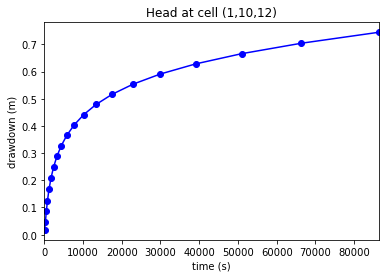

In [16]:
# Plot the drawdown versus time
idx = (0, 9, 11) #(nlay, nrow, ncol) *remember you have to subtract 1 from the original numbers for python - (1, 10, 12)*
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx to that it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (s)') #labels the x-axis
plt.ylabel('drawdown (m)') #labels the y-axis
#here we do "0-ts..." in order to show the drawdown of 
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-') #(x, y, color/type of line)
plt.xlim(0, ts[:, 0].max())


(0, 86400.0)

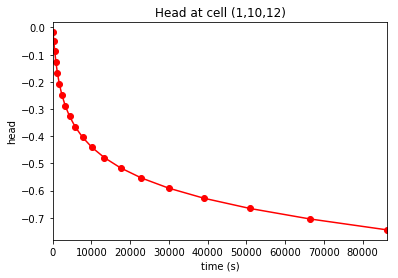

In [17]:
# Plot the head versus time
idx = (0, 9, 11)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('head')
plt.plot(ts[:, 0], ts[:, 1], 'ro-')
plt.xlim(0, ts[:, 0].max())

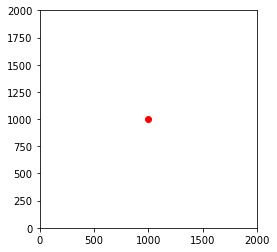

In [20]:
#create contour lines of the data
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
plt.subplot(1,1,1,aspect='equal')
hds = bf.HeadFile(fname)
head = hds.get_data(totim=86400)
levels = np.arange(0, 1, .1) #for np.arange(x value, y value, increments)
extent = (xmin, xmax, ymin, ymax) #extent is (x0, x1, y0, y1)
plt.contour(head[0,:,:], levels=levels, extent=extent)

def plot_well(xmean, ymean, sym):
    plt.plot(xmean, ymean, sym)
plot_well(xmean, ymean, sym='ro')